In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
bat = pd.read_csv("fan_bat.csv")

In [3]:
bowl = pd.read_csv("fan_bowl.csv")

In [4]:
fld = pd.read_csv("fan_fld.csv")

In [5]:
ratings = pd.read_csv("fan_final.csv")

In [6]:
# we will join players after players from two teams Chennai Super Kings and Mumbai Indians

In [7]:
# we need to add some total of 25-30 players from both squads and then add their individual stats one after the other

In [8]:
bat = bat.drop(['Batting_FP'],axis=1)

In [9]:
bowl = bowl.drop(['Bowling_FP'],axis=1)

In [10]:
fld = fld.drop(["Fielding_FP"],axis=1)

In [11]:
bat.head(1)

,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate
0,1359475,2023,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,CSK,1,Devon Conway,1,1,6,0,0,16.66


In [12]:
bowl.head(1)

,season,match_id,match_name,home_team,away_team,batting_team,bowling_team,venue,bowling_innings,fullName,overs,total_balls,dots,maidens,conceded,foursConceded,sixesConceded,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled
0,2023,1359475,GT v CSK,GT,CSK,CSK,GT,"Narendra Modi Stadium, Motera, Ahmedabad",1,Mohammed Shami,4.0,24,13,0,29,2,2,2,7.25,0,1,0,0,0,1,"[1, 3, 5, 19]"


In [13]:
fld.head(1)

,season,match_id,match_name,home_team,away_team,venue,batting_team,bowling_innings,bowling_team,fullName,catching_FP,stumping_FP,direct_runout_FP,indirect_runout_FP
0,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",GT,1,CSK,MS Dhoni,8,12,0,0


In [14]:
combine = bat.merge(bowl, on=['season','match_id','match_name',	'home_team'	,'away_team','venue','batting_team','bowling_team','fullName'],how='outer')

In [15]:
combine_df=combine.merge(fld, on=['season','match_id','match_name',	'home_team'	,'away_team','venue','batting_team','bowling_team','fullName'],how='outer')

In [16]:
combine_df.head(1)

,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate,bowling_innings_x,overs,total_balls,dots,maidens,conceded,foursConceded,sixesConceded,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled,bowling_innings_y,catching_FP,stumping_FP,direct_runout_FP,indirect_runout_FP
0,335982,2008,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",RCB,KKR,NaN,Ashley Noffke,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,24.0,7.0,0.0,40.0,2.0,2.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,"[4, 7, 16, 18]",NaN,NaN,NaN,NaN,NaN


In [17]:
# not be combining ratings as it does not have certain columns we will add it later

In [18]:
combine_df[combine_df.season == 2022].fullName.unique()

array(['Ambati Rayudu', 'Andre Russell', 'Devon Conway', 'MS Dhoni',
       'Nitish Rana', 'Ravindra Jadeja', 'Robin Uthappa',
       'Ruturaj Gaikwad', 'Sheldon Jackson', 'Shivam Dube', 'Shivam Mavi',
       'Shreyas Iyer', 'Sunil Narine', 'Umesh Yadav',
       'Varun Chakravarthy', 'Adam Milne', 'Ajinkya Rahane',
       'Dwayne Bravo', 'Mitchell Santner', 'Sam Billings',
       'Tushar Deshpande', 'Venkatesh Iyer', 'Axar Patel', 'Basil Thampi',
       'Daniel Sams', 'Ishan Kishan', 'Jasprit Bumrah', 'Lalit Yadav',
       'Mandeep Singh', 'Murugan Ashwin', 'Prithvi Shaw', 'Rishabh Pant',
       'Rohit Sharma', 'Rovman Powell', 'Shardul Thakur', 'Tilak Varma',
       'Tim David', 'Tim Seifert', 'Tymal Mills', 'Anmolpreet Singh',
       'Kamlesh Nagarkoti', 'Khaleel Ahmed', 'Kieron Pollard',
       'Kuldeep Yadav', 'Akash Deep', 'Anuj Rawat', 'Bhanuka Rajapaksa',
       'David Willey', 'Harshal Patel', 'Liam Livingstone',
       'M Shahrukh Khan', 'Mayank Agarwal', 'Mohammed Siraj',
   

In [19]:
players = ['MS Dhoni', 'Ambati Rayudu','Ben Stokes', 'Devon Conway','Nehal Wadhera','Jason Behrendorff', 'Jofra Archer', 'Piyush Chawla','Jasprit Bumrah',
       'Hardik Pandya', 'Moeen Ali', 'Ravindra Jadeja','Ishan Kishan', 'Rohit Sharma', 'Ajinkya Rahane', 'Tristan Stubbs', 'Matheesha Pathirana',
       'Ruturaj Gaikwad', 'Shivam Dube','Deepak Chahar','Hrithik Shokeen','Suryakumar Yadav', 'Tilak Varma', 'Tim David','Maheesh Theekshana']

In [20]:
micsk = combine_df[combine_df["fullName"].isin(players)]

In [21]:
micsk.fullName.unique()

array(['MS Dhoni', 'Piyush Chawla', 'Ravindra Jadeja', 'Rohit Sharma',
       'Ajinkya Rahane', 'Ambati Rayudu', 'Suryakumar Yadav',
       'Jasprit Bumrah', 'Hardik Pandya', 'Ishan Kishan', 'Deepak Chahar',
       'Ben Stokes', 'Jofra Archer', 'Moeen Ali', 'Shivam Dube',
       'Jason Behrendorff', 'Ruturaj Gaikwad', 'Tim David',
       'Devon Conway', 'Tilak Varma', 'Maheesh Theekshana',
       'Hrithik Shokeen', 'Tristan Stubbs', 'Matheesha Pathirana',
       'Nehal Wadhera'], dtype=object)

In [22]:
micsk.head(1)

,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate,bowling_innings_x,overs,total_balls,dots,maidens,conceded,foursConceded,sixesConceded,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled,bowling_innings_y,catching_FP,stumping_FP,direct_runout_FP,indirect_runout_FP
37,335983,2008,PBKS v CSK,PBKS,CSK,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh",PBKS,CSK,1.0,MS Dhoni,4.0,2.0,3.0,0.0,0.0,66.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
micsk.fillna(0,inplace=True)

In [24]:
# lets make our features now
micsk.head(1)

,match_id,season,match_name,home_team,away_team,venue,bowling_team,batting_team,batting_innings,fullName,batting_position,runs,balls,fours,sixes,strike_rate,bowling_innings_x,overs,total_balls,dots,maidens,conceded,foursConceded,sixesConceded,wickets,economyRate,wides,noballs,LBW,Hitwicket,CaughtBowled,Bowled,Overs_Bowled,bowling_innings_y,catching_FP,stumping_FP,direct_runout_FP,indirect_runout_FP
37,335983,2008,PBKS v CSK,PBKS,CSK,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh",PBKS,CSK,1.0,MS Dhoni,4.0,2.0,3.0,0.0,0.0,66.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [25]:
Runs = pd.DataFrame(micsk.groupby('fullName')['runs'].sum()).reset_index()

In [26]:
Balls = pd.DataFrame(micsk.groupby('fullName')['balls'].sum()).reset_index()

In [27]:
Fours = pd.DataFrame(micsk.groupby('fullName')['fours'].sum()).reset_index()

In [28]:
Sixes = pd.DataFrame(micsk.groupby('fullName')['sixes'].sum()).reset_index()

In [29]:
Innings = pd.DataFrame(micsk.groupby("fullName")["match_id"].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns={"match_id":"innings"})

In [30]:
Overs_bowled = pd.DataFrame(micsk.groupby('fullName')['overs'].sum()).reset_index()

In [31]:
Batting_positions = round(pd.DataFrame(micsk.groupby('fullName')['batting_position'].mean()).reset_index())

In [32]:
Bowling_innings = pd.DataFrame(micsk.groupby('fullName')['bowling_innings_x'].sum()).reset_index()

In [33]:
Dots_bowled = pd.DataFrame(micsk.groupby('fullName')['dots'].sum()).reset_index()

In [34]:
Runs_conceded = pd.DataFrame(micsk.groupby('fullName')['conceded'].sum()).reset_index()

In [35]:
Wickets = pd.DataFrame(micsk.groupby('fullName')['wickets'].sum()).reset_index()

In [36]:
Economy = pd.DataFrame(micsk.groupby('fullName')['economyRate'].mean()).reset_index()

In [37]:
Catching_points = pd.DataFrame(micsk.groupby('fullName')['catching_FP'].sum()).reset_index()

In [38]:
Stumping_points = pd.DataFrame(micsk.groupby('fullName')['stumping_FP'].sum()).reset_index()

In [39]:
Runout_points = pd.DataFrame(micsk.groupby('fullName')['direct_runout_FP'].sum()).reset_index()

In [40]:
stats = Runs.merge(Balls, on='fullName').merge(Innings,on='fullName').merge(Batting_positions, on='fullName').merge(Fours, on='fullName').merge(Sixes, on='fullName').merge(Wickets,on='fullName').merge(Overs_bowled,on='fullName').merge(Bowling_innings,on='fullName').merge(Economy,on='fullName').merge(Dots_bowled,on='fullName').merge(Runs_conceded,on='fullName').merge(Catching_points,on='fullName').merge(Stumping_points,on='fullName').merge(Runout_points,on='fullName')

In [41]:
stats

,fullName,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP
0,Ajinkya Rahane,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0
1,Ambati Rayudu,4348.0,3409.0,194,3.0,359.0,173.0,0.0,0.0,0.0,0.000000,0.0,0.0,512.0,24.0,84.0
2,Ben Stokes,935.0,698.0,45,2.0,81.0,32.0,28.0,114.5,54.0,3.903908,250.0,992.0,184.0,0.0,12.0
3,Deepak Chahar,80.0,59.0,74,1.0,2.0,6.0,72.0,254.4,103.0,6.853563,666.0,2019.0,96.0,0.0,0.0
4,Devon Conway,924.0,654.0,22,2.0,99.0,30.0,0.0,0.0,0.0,0.000000,0.0,0.0,64.0,0.0,0.0
5,Hardik Pandya,2309.0,1583.0,124,3.0,172.0,125.0,53.0,199.4,122.0,3.348925,444.0,1763.0,504.0,0.0,84.0
6,Hrithik Shokeen,66.0,65.0,13,2.0,9.0,0.0,5.0,34.0,18.0,6.937895,82.0,314.0,40.0,0.0,0.0
7,Ishan Kishan,2324.0,1731.0,87,2.0,220.0,103.0,0.0,0.0,0.0,0.000000,0.0,0.0,336.0,60.0,36.0
8,Jason Behrendorff,6.0,9.0,17,1.0,0.0,0.0,19.0,61.0,25.0,8.196316,146.0,552.0,16.0,0.0,0.0
9,Jasprit Bumrah,56.0,66.0,120,2.0,4.0,1.0,145.0,456.2,182.0,6.074178,1142.0,3379.0,88.0,0.0,72.0


In [42]:
stats["avg"] = stats.apply(lambda x: x["runs"]/x["innings"],axis=1)

In [43]:
stats["strike_rate"] = stats.apply(lambda x: 100*(x["runs"]/x["balls"])if (x['balls'])!= 0 else 0,axis=1)

In [44]:
stats["BPB"]= stats.apply(lambda x: (x["balls"]/(x["fours"]+x["sixes"])) if (x["fours"]+x["sixes"])!= 0 else 0,axis=1)

In [45]:
ratings.head(1)

,season,match_id,match_name,home_team,away_team,venue,batting_innings,bowling_innings,fullName,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
0,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Sai Sudharsan,4,130,0,0,134,1,1,0


In [46]:
micsk_ratings = ratings[ratings["fullName"].isin(players)]

In [47]:
micsk_ratings.head(1)

,season,match_id,match_name,home_team,away_team,venue,batting_innings,bowling_innings,fullName,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
5,2023,1370353,GT v CSK,GT,CSK,"Narendra Modi Stadium, Motera, Ahmedabad",1,2,Hardik Pandya,4,31,0,0,35,0,0,0


In [48]:
dream_11 = pd.DataFrame(micsk_ratings.groupby('fullName')['Starting_11'].count()).reset_index()

In [49]:
Batting_FP = pd.DataFrame(micsk_ratings.groupby('fullName')['Batting_FP'].sum()).reset_index()

In [50]:
Bowling_FP = pd.DataFrame(micsk_ratings.groupby('fullName')['Bowling_FP'].sum()).reset_index()

In [51]:
Fielding_FP = pd.DataFrame(micsk_ratings.groupby('fullName')['Fielding_FP'].sum()).reset_index()
Total_FP = pd.DataFrame(micsk_ratings.groupby('fullName')['Total_FP'].sum()).reset_index()
Dream_team = pd.DataFrame(micsk_ratings.groupby('fullName')['Dream Team'].sum()).reset_index()

In [52]:
Captain = pd.DataFrame(micsk_ratings.groupby('fullName')['Captain'].sum()).reset_index()
Vice_captain = pd.DataFrame(micsk_ratings.groupby('fullName')['Vice Captain'].sum()).reset_index()

In [53]:
ratings_stats = dream_11.merge(Batting_FP, on='fullName').merge(Bowling_FP,on='fullName').merge(Fielding_FP,on='fullName').merge(Total_FP,on='fullName').merge(Dream_team,on='fullName').merge(Captain,on='fullName').merge(Vice_captain,on='fullName')

In [54]:
ratings_stats.head()

,fullName,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
0,Ajinkya Rahane,162,5527,33,642,6850,86,14,8
1,Ambati Rayudu,194,5529,0,684,6989,94,7,12
2,Ben Stokes,45,1196,778,202,2356,26,8,2
3,Deepak Chahar,74,104,2084,108,2592,38,3,3
4,Devon Conway,22,1213,0,70,1371,15,3,3


In [55]:
stats = stats.merge(ratings_stats, on='fullName')

In [56]:
stats.head()

,fullName,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP,avg,strike_rate,BPB,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
0,Ajinkya Rahane,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0,27.160494,123.422160,6.470054,162,5527,33,642,6850,86,14,8
1,Ambati Rayudu,4348.0,3409.0,194,3.0,359.0,173.0,0.0,0.0,0.0,0.000000,0.0,0.0,512.0,24.0,84.0,22.412371,127.544735,6.407895,194,5529,0,684,6989,94,7,12
2,Ben Stokes,935.0,698.0,45,2.0,81.0,32.0,28.0,114.5,54.0,3.903908,250.0,992.0,184.0,0.0,12.0,20.777778,133.954155,6.176991,45,1196,778,202,2356,26,8,2
3,Deepak Chahar,80.0,59.0,74,1.0,2.0,6.0,72.0,254.4,103.0,6.853563,666.0,2019.0,96.0,0.0,0.0,1.081081,135.593220,7.375000,74,104,2084,108,2592,38,3,3
4,Devon Conway,924.0,654.0,22,2.0,99.0,30.0,0.0,0.0,0.0,0.000000,0.0,0.0,64.0,0.0,0.0,42.000000,141.284404,5.069767,22,1213,0,70,1371,15,3,3


In [57]:
# feature extraction

In [58]:
stats.head()

,fullName,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP,avg,strike_rate,BPB,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain
0,Ajinkya Rahane,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0,27.160494,123.422160,6.470054,162,5527,33,642,6850,86,14,8
1,Ambati Rayudu,4348.0,3409.0,194,3.0,359.0,173.0,0.0,0.0,0.0,0.000000,0.0,0.0,512.0,24.0,84.0,22.412371,127.544735,6.407895,194,5529,0,684,6989,94,7,12
2,Ben Stokes,935.0,698.0,45,2.0,81.0,32.0,28.0,114.5,54.0,3.903908,250.0,992.0,184.0,0.0,12.0,20.777778,133.954155,6.176991,45,1196,778,202,2356,26,8,2
3,Deepak Chahar,80.0,59.0,74,1.0,2.0,6.0,72.0,254.4,103.0,6.853563,666.0,2019.0,96.0,0.0,0.0,1.081081,135.593220,7.375000,74,104,2084,108,2592,38,3,3
4,Devon Conway,924.0,654.0,22,2.0,99.0,30.0,0.0,0.0,0.0,0.000000,0.0,0.0,64.0,0.0,0.0,42.000000,141.284404,5.069767,22,1213,0,70,1371,15,3,3


In [59]:
data = stats.drop(['fullName'],axis=1)

In [60]:
corr_data = data.corr()

In [61]:
corr_data['Dream Team'].sort_values(ascending = False)

Dream Team           1.000000
innings              0.993428
Starting_11          0.993428
Total_FP             0.992699
catching_FP          0.899154
Vice Captain         0.842251
Fielding_FP          0.841402
direct_runout_FP     0.831480
balls                0.808466
runs                 0.802278
Batting_FP           0.794492
Captain              0.786423
sixes                0.774208
fours                0.748136
bowling_innings_x    0.471663
stumping_FP          0.438130
overs                0.431818
conceded             0.429887
Bowling_FP           0.416832
wickets              0.412998
dots                 0.393870
strike_rate          0.175046
avg                  0.151159
BPB                  0.097415
batting_position     0.066531
economyRate         -0.233227
Name: Dream Team, dtype: float64

In [62]:
print(data["Dream Team"].value_counts())

Dream Team
62     2
86     1
34     1
11     1
17     1
65     1
25     1
31     1
124    1
131    1
105    1
5      1
10     1
94     1
9      1
134    1
24     1
8      1
51     1
3      1
15     1
38     1
26     1
1      1
Name: count, dtype: int64


In [63]:
data['Dream Team Label'] = (data['Dream Team'] / data['innings']) > 0.5

In [64]:
data['Dream Team Label'] = data['Dream Team Label'].astype(int)

In [65]:
data.head()

,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP,avg,strike_rate,BPB,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain,Dream Team Label
0,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0,27.160494,123.422160,6.470054,162,5527,33,642,6850,86,14,8,1
1,4348.0,3409.0,194,3.0,359.0,173.0,0.0,0.0,0.0,0.000000,0.0,0.0,512.0,24.0,84.0,22.412371,127.544735,6.407895,194,5529,0,684,6989,94,7,12,0
2,935.0,698.0,45,2.0,81.0,32.0,28.0,114.5,54.0,3.903908,250.0,992.0,184.0,0.0,12.0,20.777778,133.954155,6.176991,45,1196,778,202,2356,26,8,2,1
3,80.0,59.0,74,1.0,2.0,6.0,72.0,254.4,103.0,6.853563,666.0,2019.0,96.0,0.0,0.0,1.081081,135.593220,7.375000,74,104,2084,108,2592,38,3,3,1
4,924.0,654.0,22,2.0,99.0,30.0,0.0,0.0,0.0,0.000000,0.0,0.0,64.0,0.0,0.0,42.000000,141.284404,5.069767,22,1213,0,70,1371,15,3,3,1


In [66]:
# splitting the data 

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x = data.drop(['Dream Team Label'],axis=1)
y = data['Dream Team Label']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
LR = LogisticRegression()

In [72]:
LR.fit(xtrain, ytrain)

LogisticRegression()

In [73]:
ypred = LR.predict(xtest)

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [75]:
accuracy = accuracy_score(ytest, ypred)
accuracy

0.8

In [76]:
classification = classification_report(ytest, ypred)
classification

'              precision    recall  f1-score   support\n\n           0       0.67      1.00      0.80         2\n           1       1.00      0.67      0.80         3\n\n    accuracy                           0.80         5\n   macro avg       0.83      0.83      0.80         5\nweighted avg       0.87      0.80      0.80         5\n'

In [77]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2, 0],
       [1, 2]], dtype=int64)

In [78]:
y_pred_proba = LR.predict_proba(xtest)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(ytest, y_pred_proba)
roc_auc

0.6666666666666666

In [79]:
# Our model is performing well but still maybe with Randomforest it can perform better

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(n_estimators=5, max_depth = 2, random_state=42)

In [82]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)

In [83]:
rfc_pred = rfc.predict(xtest)

In [84]:
rfc_accuracy = accuracy_score(ytest, rfc_pred)
rfc_accuracy

0.8

In [85]:
rfc_classification_report = classification_report(ytest, rfc_pred)
rfc_classification_report

'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         2\n           1       0.75      1.00      0.86         3\n\n    accuracy                           0.80         5\n   macro avg       0.88      0.75      0.76         5\nweighted avg       0.85      0.80      0.78         5\n'

In [86]:
# lets do feature importance

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [88]:
feature_importances = rfc.feature_importances_

In [89]:
feature_names = xtrain.columns  
sorted_indices = np.argsort(feature_importances)[::-1]  

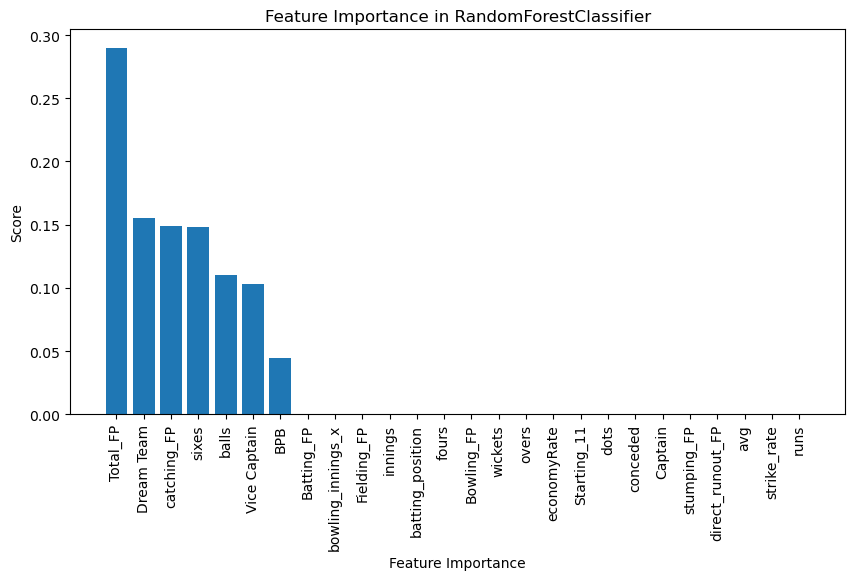

In [90]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Score")
plt.title("Feature Importance in RandomForestClassifier")
plt.show()

In [91]:
# lets try xgboost for once and then we will use only the important features only in randomforestclassifier

In [92]:
from xgboost import XGBClassifier

In [93]:
xgb_model = XGBClassifier(n_estimators=5, max_depth=2, learning_rate=0.1, random_state=42)
xgb_model.fit(xtrain, ytrain)
xgb_pred = xgb_model.predict(xtest)

print("XGBoost Accuracy:", accuracy_score(ytest, xgb_pred))
print("Classification Report:\n", classification_report(ytest, xgb_pred))

XGBoost Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.38         5
weighted avg       0.36      0.60      0.45         5



In [94]:
# so rfc remains the best we will stick with it and fine tune it

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
cv_scores = cross_val_score(rfc, xtrain, ytrain, cv=5)

In [97]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.25 0.75 0.25 0.75 1.  ]
Mean CV Score: 0.6


In [98]:
# for once lets train svm

In [99]:
from sklearn.svm import SVC

In [100]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

In [101]:
svm_model.fit(xtrain, ytrain)

SVC(C=1, random_state=42)

In [102]:
y_pred_svm = svm_model.predict(xtest)

In [103]:
print("SVM Accuracy:", accuracy_score(ytest, y_pred_svm))
print("SVM Classification Report:\n", classification_report(ytest, y_pred_svm))

SVM Accuracy: 0.4
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



In [104]:
# lets get back to randomforestclassifier

In [105]:
data.head(2)

,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP,avg,strike_rate,BPB,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain,Dream Team Label
0,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0,27.160494,123.422160,6.470054,162,5527,33,642,6850,86,14,8,1
1,4348.0,3409.0,194,3.0,359.0,173.0,0.0,0.0,0.0,0.000000,0.0,0.0,512.0,24.0,84.0,22.412371,127.544735,6.407895,194,5529,0,684,6989,94,7,12,0


In [106]:
x = data.drop(['Dream Team Label','economyRate'],axis=1)
y = data['Dream Team Label']

In [107]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [108]:
rfcl = RandomForestClassifier(n_estimators = 5, max_depth = 2, random_state=42)

In [109]:
rfcl.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)

In [110]:
rfcl_pred = rfcl.predict(xtest)

In [111]:
rfcl_accuracy = accuracy_score(ytest, rfcl_pred)
rfcl_accuracy

0.8

In [112]:
rfcl_class = classification_report(ytest, rfcl_pred)
rfcl_class

'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         2\n           1       0.75      1.00      0.86         3\n\n    accuracy                           0.80         5\n   macro avg       0.88      0.75      0.76         5\nweighted avg       0.85      0.80      0.78         5\n'

In [113]:
importances = rfc.feature_importances_
sorted(zip(importances, x.columns), reverse=True)

[(0.29, 'Dream Team'),
 (0.15555555555555553, 'Captain'),
 (0.14922279792746118, 'stumping_FP'),
 (0.14796595709261917, 'sixes'),
 (0.11000000000000001, 'balls'),
 (0.044444444444444446, 'Starting_11'),
 (0.0, 'wickets'),
 (0.0, 'strike_rate'),
 (0.0, 'runs'),
 (0.0, 'overs'),
 (0.0, 'innings'),
 (0.0, 'fours'),
 (0.0, 'dots'),
 (0.0, 'direct_runout_FP'),
 (0.0, 'conceded'),
 (0.0, 'catching_FP'),
 (0.0, 'bowling_innings_x'),
 (0.0, 'batting_position'),
 (0.0, 'avg'),
 (0.0, 'Vice Captain'),
 (0.0, 'Total_FP'),
 (0.0, 'Fielding_FP'),
 (0.0, 'Bowling_FP'),
 (0.0, 'Batting_FP'),
 (0.0, 'BPB')]

In [114]:
data.head(1)

,runs,balls,innings,batting_position,fours,sixes,wickets,overs,bowling_innings_x,economyRate,dots,conceded,catching_FP,stumping_FP,direct_runout_FP,avg,strike_rate,BPB,Starting_11,Batting_FP,Bowling_FP,Fielding_FP,Total_FP,Dream Team,Captain,Vice Captain,Dream Team Label
0,4400.0,3565.0,162,1.0,455.0,96.0,1.0,1.0,1.0,0.022222,2.0,5.0,552.0,0.0,36.0,27.160494,123.42216,6.470054,162,5527,33,642,6850,86,14,8,1


In [127]:
X = data.drop(['runs','balls','innings','batting_position','wickets','BPB',	'Batting_FP','Bowling_FP','Fielding_FP','Total_FP','Vice Captain','avg','bowling_innings_x','catching_FP','conceded','direct_runout_FP','dots','fours','overs','strike_rate','Dream Team Label'],axis=1)
y = data['Dream Team Label']

In [128]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [129]:
rfci = RandomForestClassifier(n_estimators=5, max_depth = 2, random_state=42)

In [130]:
rfci.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)

In [131]:
rfci_pred = rfci.predict(x_test)

In [133]:
accuracy = accuracy_score(y_test, rfci_pred)
accuracy

0.875

In [135]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log)}")

Logistic Regression Accuracy: 1.0


### Model Validation

In [136]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [1.  0.8 0.8 1.  0.8]
Mean CV Score: 0.8800000000000001


### Hypertuning the model

In [137]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X, y)
print("Best parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best parameters: {'C': 0.1}
Best CV Score: 0.9199999999999999


In [138]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())], voting='soft')
ensemble_model.fit(x_train, y_train)
print("Ensemble Accuracy:", ensemble_model.score(x_test, y_test))

Ensemble Accuracy: 1.0


In [139]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ensemble_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [1.  0.8 1.  1.  0.8]
Mean CV Score: 0.9199999999999999


In [148]:
new_match_data = X.copy()
new_match_data

,sixes,economyRate,stumping_FP,Starting_11,Dream Team,Captain
0,96.0,0.022222,0.0,162,86,14
1,173.0,0.000000,24.0,194,94,7
2,32.0,3.903908,0.0,45,26,8
3,6.0,6.853563,0.0,74,38,3
4,30.0,0.000000,0.0,22,15,3
5,125.0,3.348925,0.0,124,62,9
6,0.0,6.937895,0.0,13,3,0
7,103.0,0.000000,60.0,87,51,5
8,0.0,8.196316,0.0,17,8,0
9,1.0,6.074178,0.0,120,62,5


### Lets make the prediction

In [150]:
predictions = ensemble_model.predict(new_match_data)
new_match_data['Dream Team Prediction'] = predictions

In [153]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0])

In [155]:
print(new_match_data[['sixes', 'economyRate', 'stumping_FP', 'Starting_11', 'Dream Team','Captain','Dream Team Prediction']])

    sixes  economyRate  stumping_FP  Starting_11  Dream Team  Captain  Dream Team Prediction
0    96.0     0.022222          0.0          162          86       14                      1
1   173.0     0.000000         24.0          194          94        7                      0
2    32.0     3.903908          0.0           45          26        8                      1
3     6.0     6.853563          0.0           74          38        3                      1
4    30.0     0.000000          0.0           22          15        3                      1
5   125.0     3.348925          0.0          124          62        9                      0
6     0.0     6.937895          0.0           13           3        0                      0
7   103.0     0.000000         60.0           87          51        5                      1
8     0.0     8.196316          0.0           17           8        0                      0
9     1.0     6.074178          0.0          120          62        5 